# Installation

it will take some minutes to install GMT in colab

In [1]:
import sys
if 'google.colab' in sys.modules:
    !sudo apt update 
    !sudo apt upgrade -y
    !sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
    # clone gmt from source
    !git clone --depth 50 https://github.com/GenericMappingTools/gmt
    # cmake everything
    !cmake /content/gmt
    # build and install
    !cmake --build . --target install

    !pip install pygmt geopandas geopandas openpyxl obspy ipykernel
    !git clone https://github.com/ecastillot/EQViewer.git /content/EQViewer

**Please restart your kernel**. And then, enjoy the following

In [2]:
import sys
import os
if 'google.colab' in sys.modules:
    repository_path = r"/content/EQViewer"  
else:
    repository_path = r"/home/emmanuel/EQViewer"  ##change this path where is located the main directory

sys.path.insert(0,repository_path)
rep_data = os.path.join(repository_path,"data")
rep_out = os.path.join(repository_path,"docs","figures")


# Shapes

In this notebook, you will see some examples to manipulate the Shape object. You also will learn how to use it to plot it in your map.

In [38]:
import geopandas as gpd
from EQViewer.eqviewer import Shape,BasePlot

Shape object receives a geodataframe as input. We are going to load some faults saved in [faults.shp](https://github.com/ecastillot/EQViewer/tree/master/data/shapes/faults) taken from this [database](https://www.usgs.gov/programs/earthquake-hazards/faults)

In [39]:
shapepath = os.path.join(rep_data,"shapes","faults","faults.shp")
gdf = gpd.read_file(shapepath)
gdf

,fault_name,section_na,fault_id,section_id,Location,linetype,age,dip_direct,slip_rate,slip_sense,...,strike,fault_leng,cooperator,earthquake,review_dat,fault_url,symbology,ref_id,Shape_Leng,geometry
0,San Andreas fault zone,North Coast section,1,b,California,Inferred,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,...,N36°W,1082,California Geological Survey,San Francisco earthquake,2002-12-10,https://earthquake.usgs.gov/cfusion/qfault/sho...,historic Inferred,1b,169.435872,"LINESTRING (-123.69531 39.00751, -123.69508 39..."
1,San Andreas fault zone,North Coast section,1,b,California,Inferred,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,...,N36°W,1082,California Geological Survey,San Francisco earthquake,2002-12-10,https://earthquake.usgs.gov/cfusion/qfault/sho...,historic Inferred,1b,314.892267,"LINESTRING (-123.65695 38.95836, -123.65751 38..."
2,San Andreas fault zone,North Coast section,1,b,California,Inferred,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,...,N36°W,1082,California Geological Survey,San Francisco earthquake,2002-12-10,https://earthquake.usgs.gov/cfusion/qfault/sho...,historic Inferred,1b,323.201936,"LINESTRING (-123.65000 38.94797, -123.65138 38..."
3,San Andreas fault zone,North Coast section,1,b,California,Inferred,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,...,N36°W,1082,California Geological Survey,San Francisco earthquake,2002-12-10,https://earthquake.usgs.gov/cfusion/qfault/sho...,historic Inferred,1b,4316.664950,"LINESTRING (-123.64992 38.94795, -123.64915 38..."
4,San Andreas fault zone,North Coast section,1,b,California,Inferred,historic,Vertical,Greater than 5.0 mm/yr,Right lateral,...,N36°W,1082,California Geological Survey,San Francisco earthquake,2002-12-10,https://earthquake.usgs.gov/cfusion/qfault/sho...,historic Inferred,1b,88.383286,"LINESTRING (-123.34458 38.62597, -123.34406 38..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5377,Unnamed fault in California,None,0,None,California,Well Constrained,undifferentiated Quaternary,None,None,None,...,None,0,California Geological Survey,None,2010-01-01,None,undifferentiated Quaternary Well Constrained,0,624.565258,"LINESTRING (-122.52639 38.35247, -122.52583 38..."
5378,Unnamed fault in California,None,0,None,California,Well Constrained,undifferentiated Quaternary,None,None,None,...,None,0,California Geological Survey,None,2010-01-01,None,undifferentiated Quaternary Well Constrained,0,320.447983,"LINESTRING (-122.52639 38.35247, -122.52589 38..."
5379,Unnamed fault in California,None,0,None,California,Well Constrained,undifferentiated Quaternary,None,None,None,...,None,0,California Geological Survey,None,2010-01-01,None,undifferentiated Quaternary Well Constrained,0,1226.505365,"LINESTRING (-122.52428 38.35020, -122.52393 38..."
5380,Unnamed fault in California,None,0,None,California,Well Constrained,undifferentiated Quaternary,None,None,None,...,None,0,California Geological Survey,None,2010-01-01,None,undifferentiated Quaternary Well Constrained,0,493.499184,"LINESTRING (-122.52085 38.36707, -122.52138 38..."


You can define how do you want to plot the shape object in your map. 

BasePlot helps us with this task, it receives [pygmt.plot](https://www.pygmt.org/latest/api/generated/pygmt.Figure.plot.html) parameters, the only difference is in the size parameter. BasePlot receives it as lambda function to transform the size. Take a look in the  [Example No.3: With colobar and diferent size of 3_catalog.ipynb.](https://github.com/ecastillot/EQviewer/blob/master/examples/3_catalog.ipynb)

When we print the shape object, it shows us the number of geometries. In this case, these geometries mean the number of faults.

In [40]:
faults_shape = Shape(data=gdf,projection="EPSG:4326",
                    baseplot=BasePlot(color=None, 
                            pen=["0.02c,black,-"],
                            label="Faults"
                            ))
print(faults_shape)

Shape | 5382 geometries


There are some util functions. For instance, sort values by features specified in the geodataframe.

In [41]:
faults_shape.sort_values(by="fault_leng",ignore_index=True)
print(faults_shape.data["fault_leng"])

0          0
1          0
2          0
3          0
4          0
        ... 
5377    1082
5378    1082
5379    1082
5380    1082
5381    1082
Name: fault_leng, Length: 5382, dtype: int64


Plot your shape object in a map.

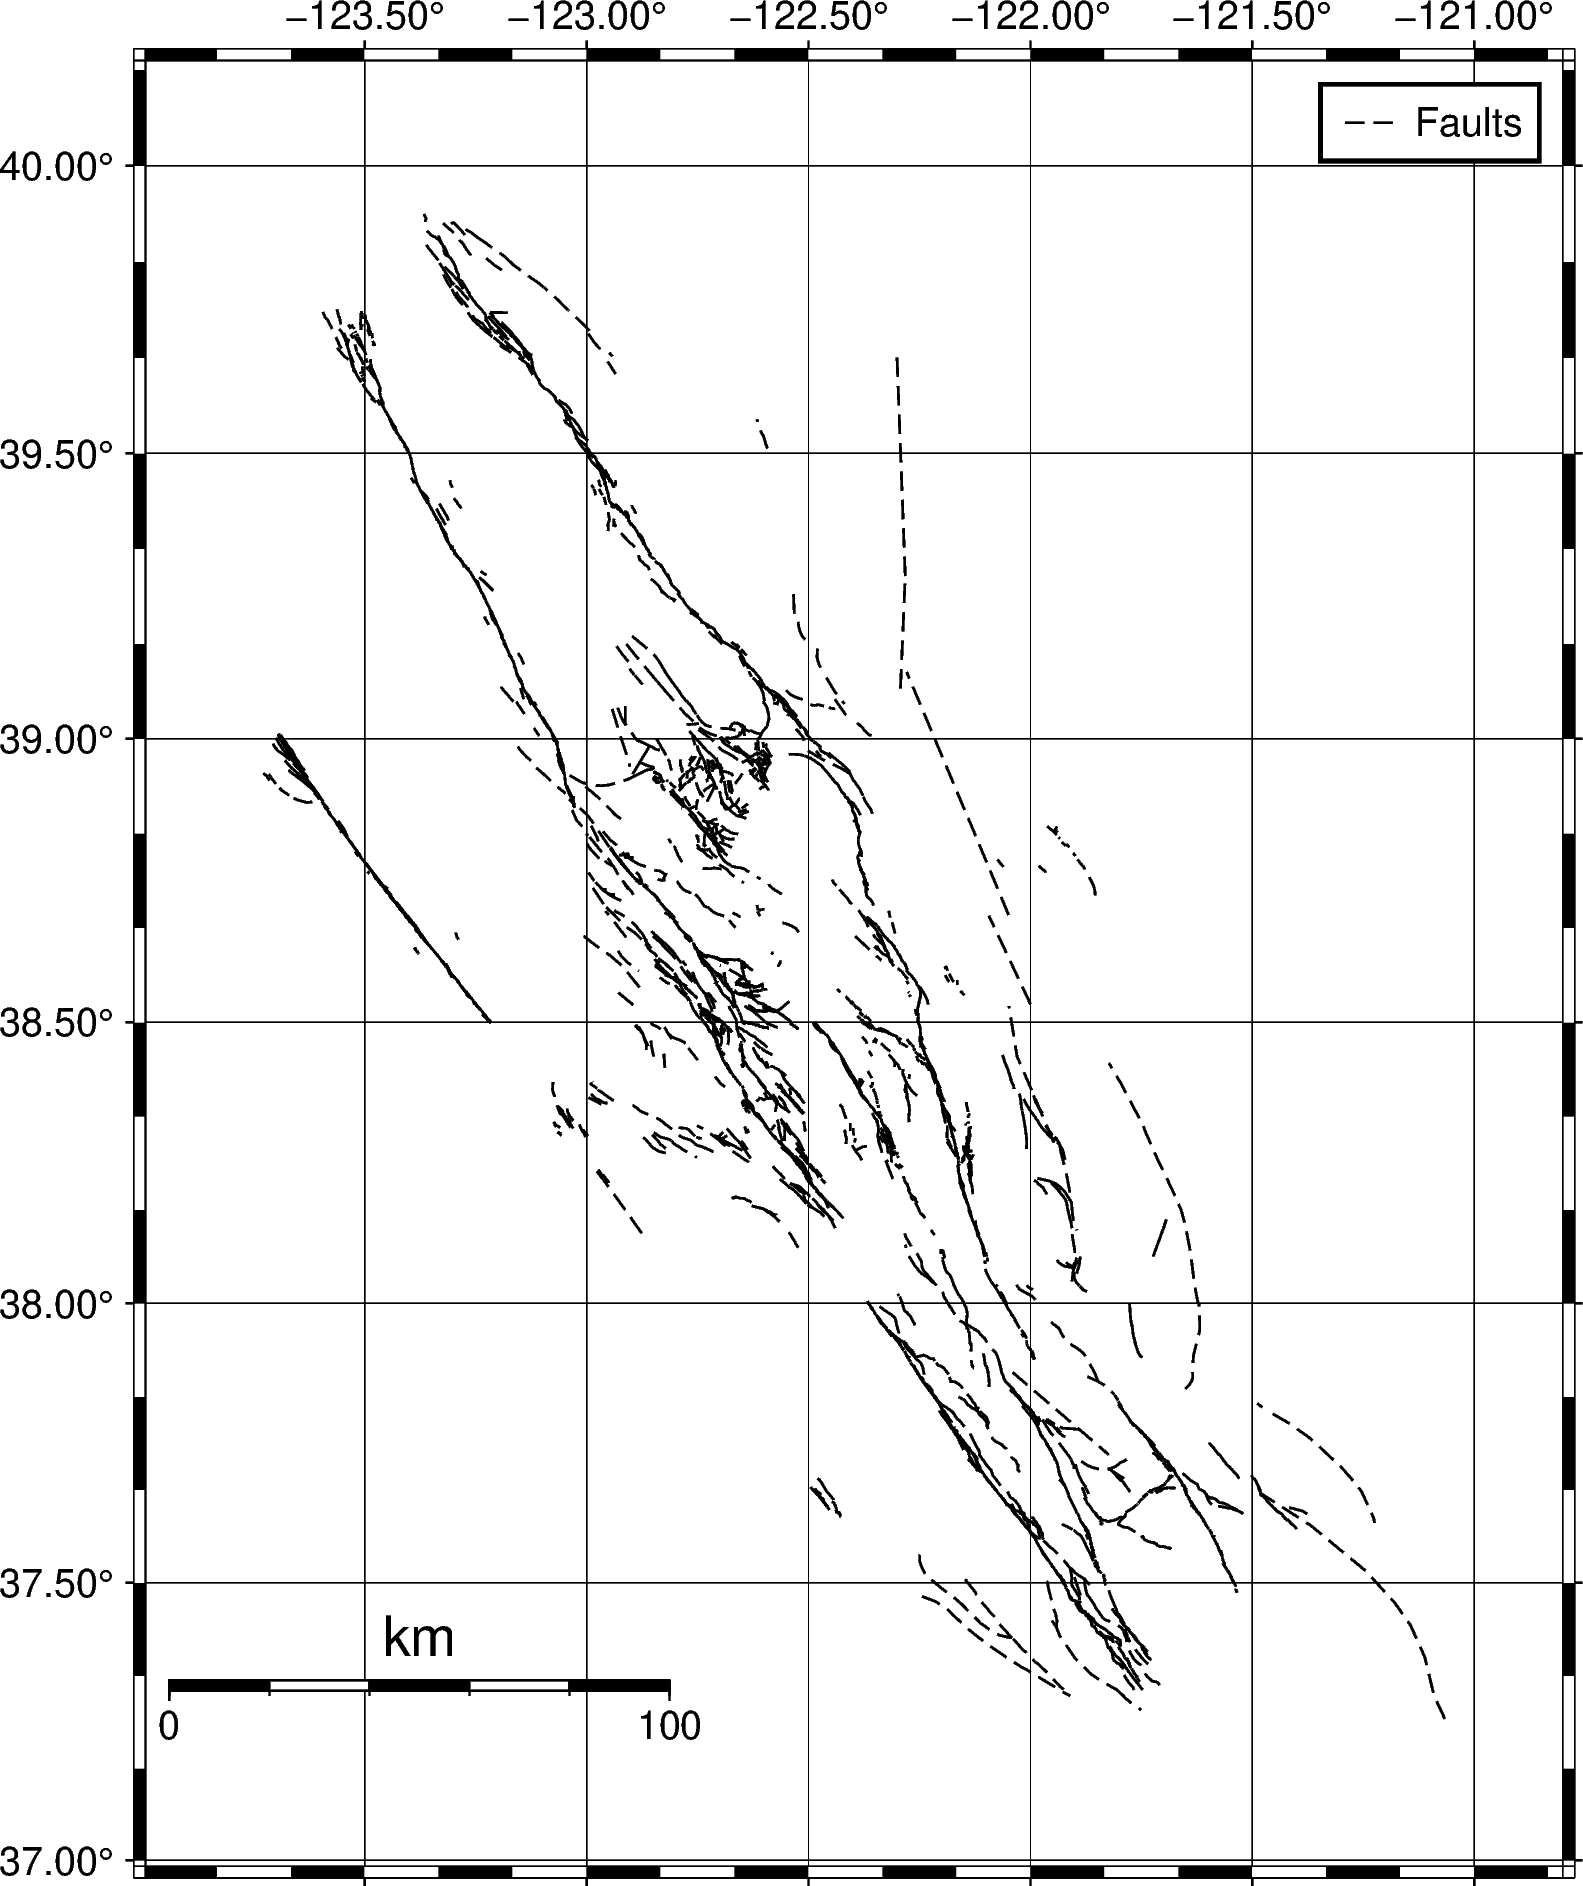

In [42]:
fig = faults_shape.plot_map()
fig.basemap(map_scale=f"g{-123.51}/{37.2}+c{-123.51}/{37.2}+w{100}k+o0.5c/0.5c+f+lkm+at")
fig.legend()
fig.show()

Or you can plot it in a high resolution map. 

- We are going to take the region limits calculated in the shape object, but you can specify the region you want.
- We also are going to plot the faults with different color and style

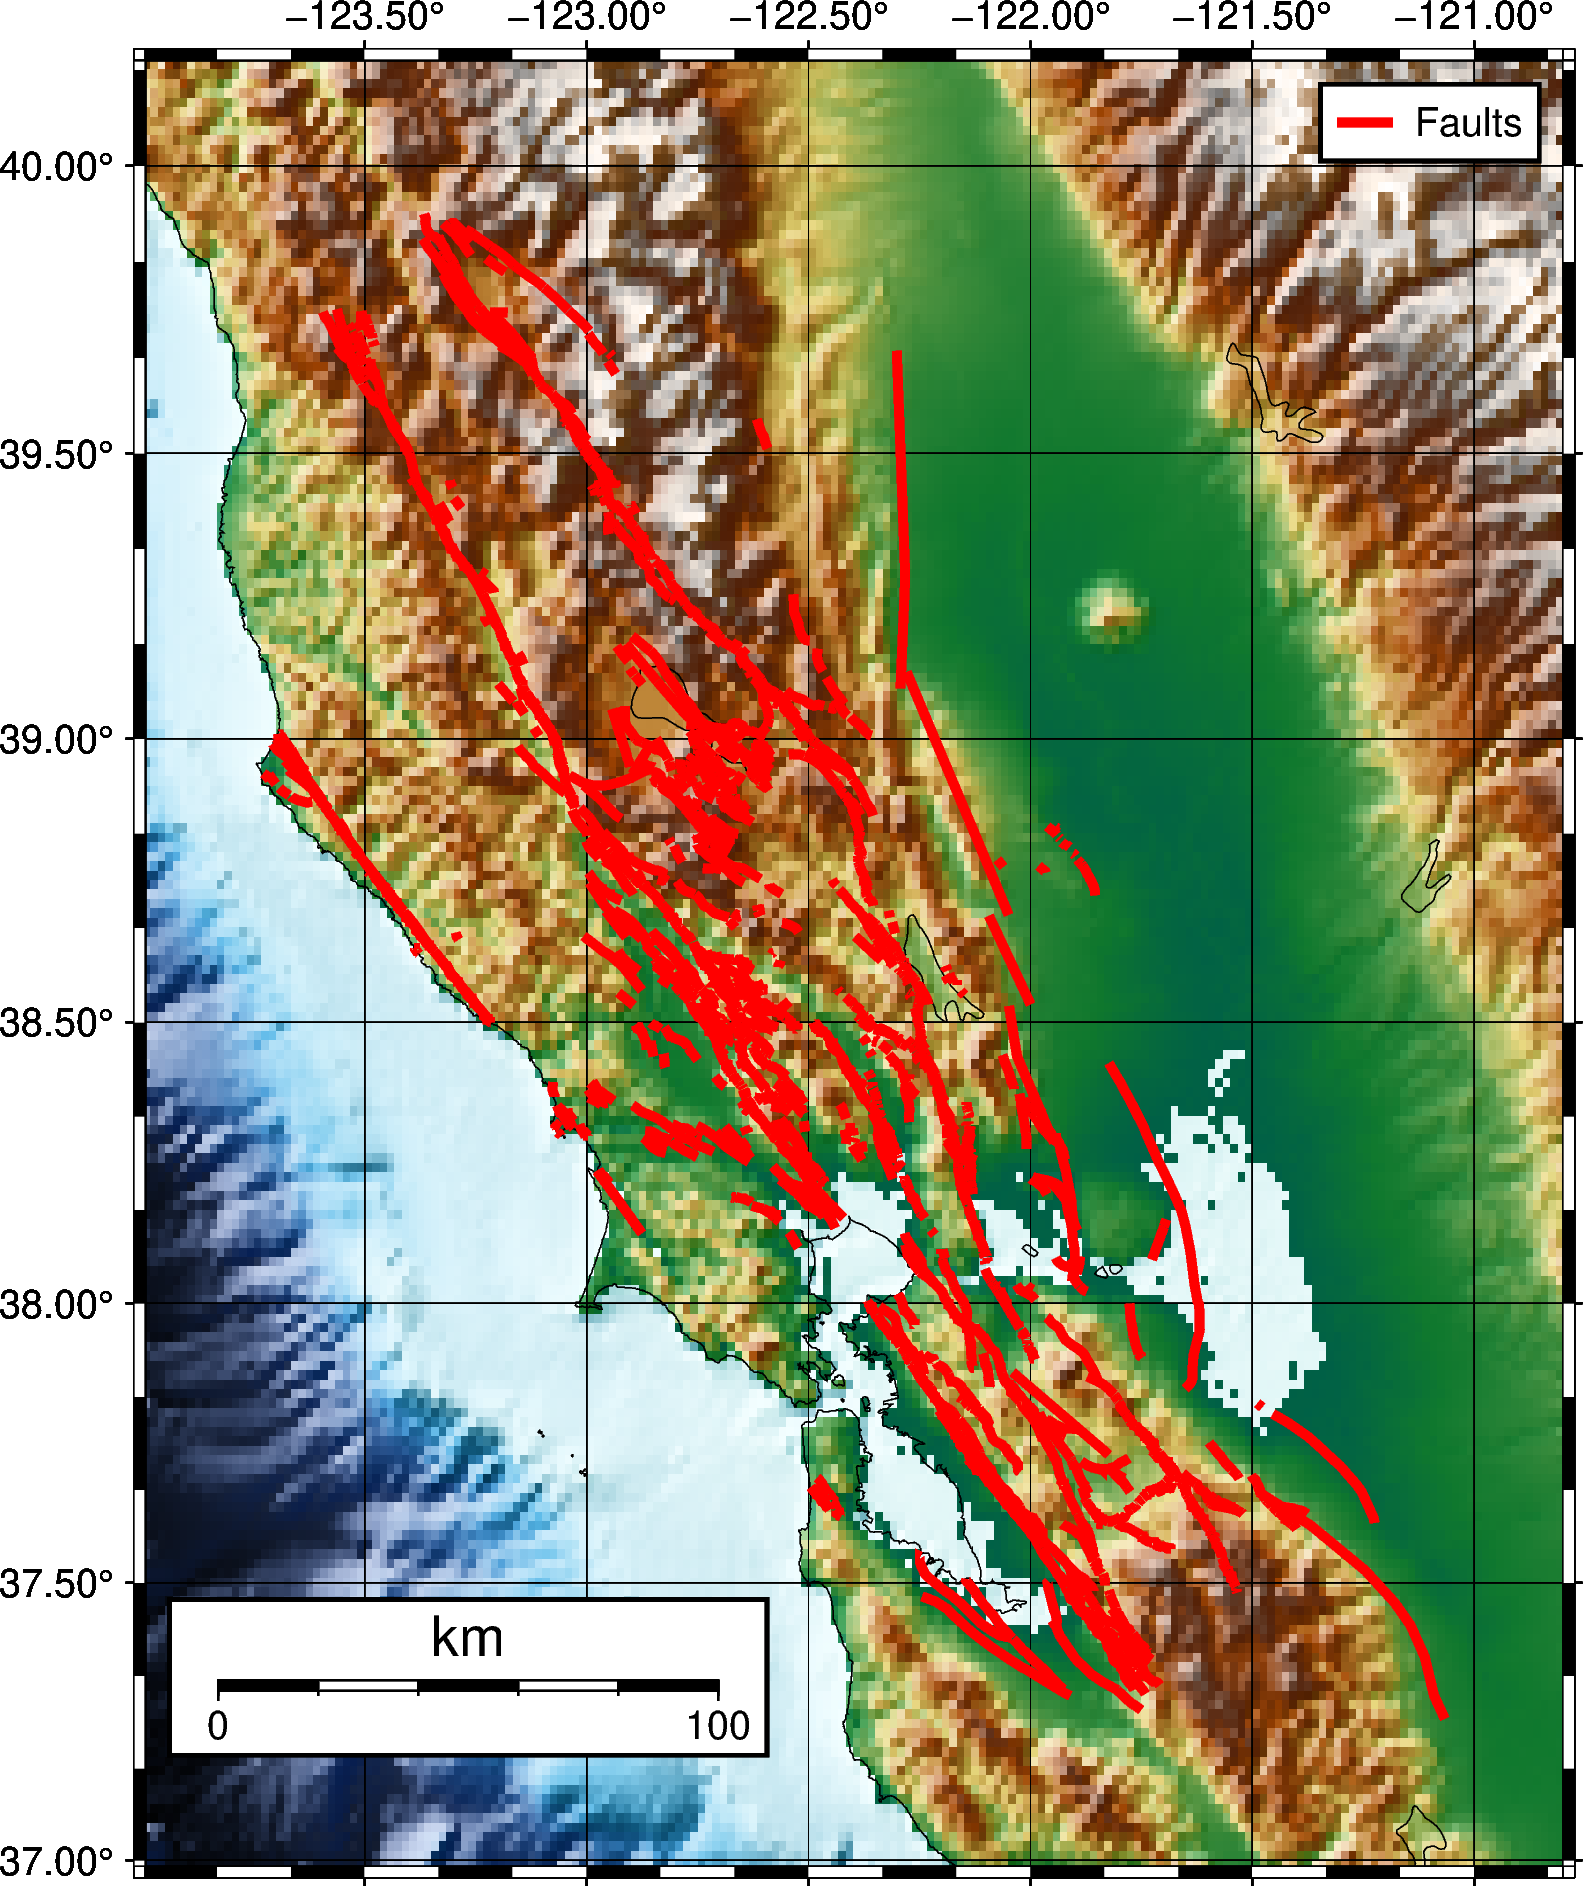

In [59]:
import pygmt

faults_region = faults_shape.get_region(padding=0.1)
faults_shape.baseplot.pen = "0.08c,red"

fig = pygmt.Figure() 
fig.basemap(region=faults_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01m', #01m resolution 
            cmap=True,
            shading=True,
            frame=["afg","WNse"]
        )
fig.coast(
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = faults_shape.plot_map(fig)
fig.basemap(map_scale=f"g{-123.4}/{37.2}+c{-123.4}/{37.2}+w{100}k+o0.5c/0.5c+f+lkm+at",box='+gwhite+p1p')
fig.legend()
fig.show()

# MulShape

MulShape refers to multiple Shape objects. It receives a list of Shape objects and inheridate every method.

In [44]:
from EQViewer.eqviewer import MulShape

We will use different shapes to instance Mulshape

In [45]:
shape1 = faults_shape.copy()
shape1.select_data({"dip_direct":["E"]})
shape1.baseplot.pen = "0.08c,orange"
shape1.baseplot.label = "E"

shape2 = faults_shape.copy()
shape2.select_data({"dip_direct":["W"]})
shape2.baseplot.pen = "0.08c,blue"
shape2.baseplot.label = "W"

shape3 = faults_shape.copy()
shape3.select_data({"dip_direct":["N"]})
shape3.baseplot.pen = "0.08c,cyan"
shape3.baseplot.label = "N"

shape4 = faults_shape.copy()
shape4.select_data({"dip_direct":["NE"]})
shape4.baseplot.pen = "0.08c,magenta"
shape4.baseplot.label = "NE"

shape5 = faults_shape.copy()
shape5.select_data({"dip_direct":["V"]})
shape5.baseplot.pen = "0.08c,brown"
shape5.baseplot.label = "V"

shape6 = faults_shape.copy()
shape6.select_data({"dip_direct":["Vertical"]})
shape6.baseplot.pen = "0.08c,lightblue"
shape6.baseplot.label = "Vert."

mulshape = MulShape(shapes=[shape1,shape2,shape3,shape4,shape5,shape6])
print(mulshape)

Shapes (6 shapes)
------------------
1. Shape | 198 geometries
2. Shape | 260 geometries
3. Shape | 65 geometries
4. Shape | 1 geometries
5. Shape | 1 geometries
6. Shape | 3520 geometries


Plot your mulshape object in a map.

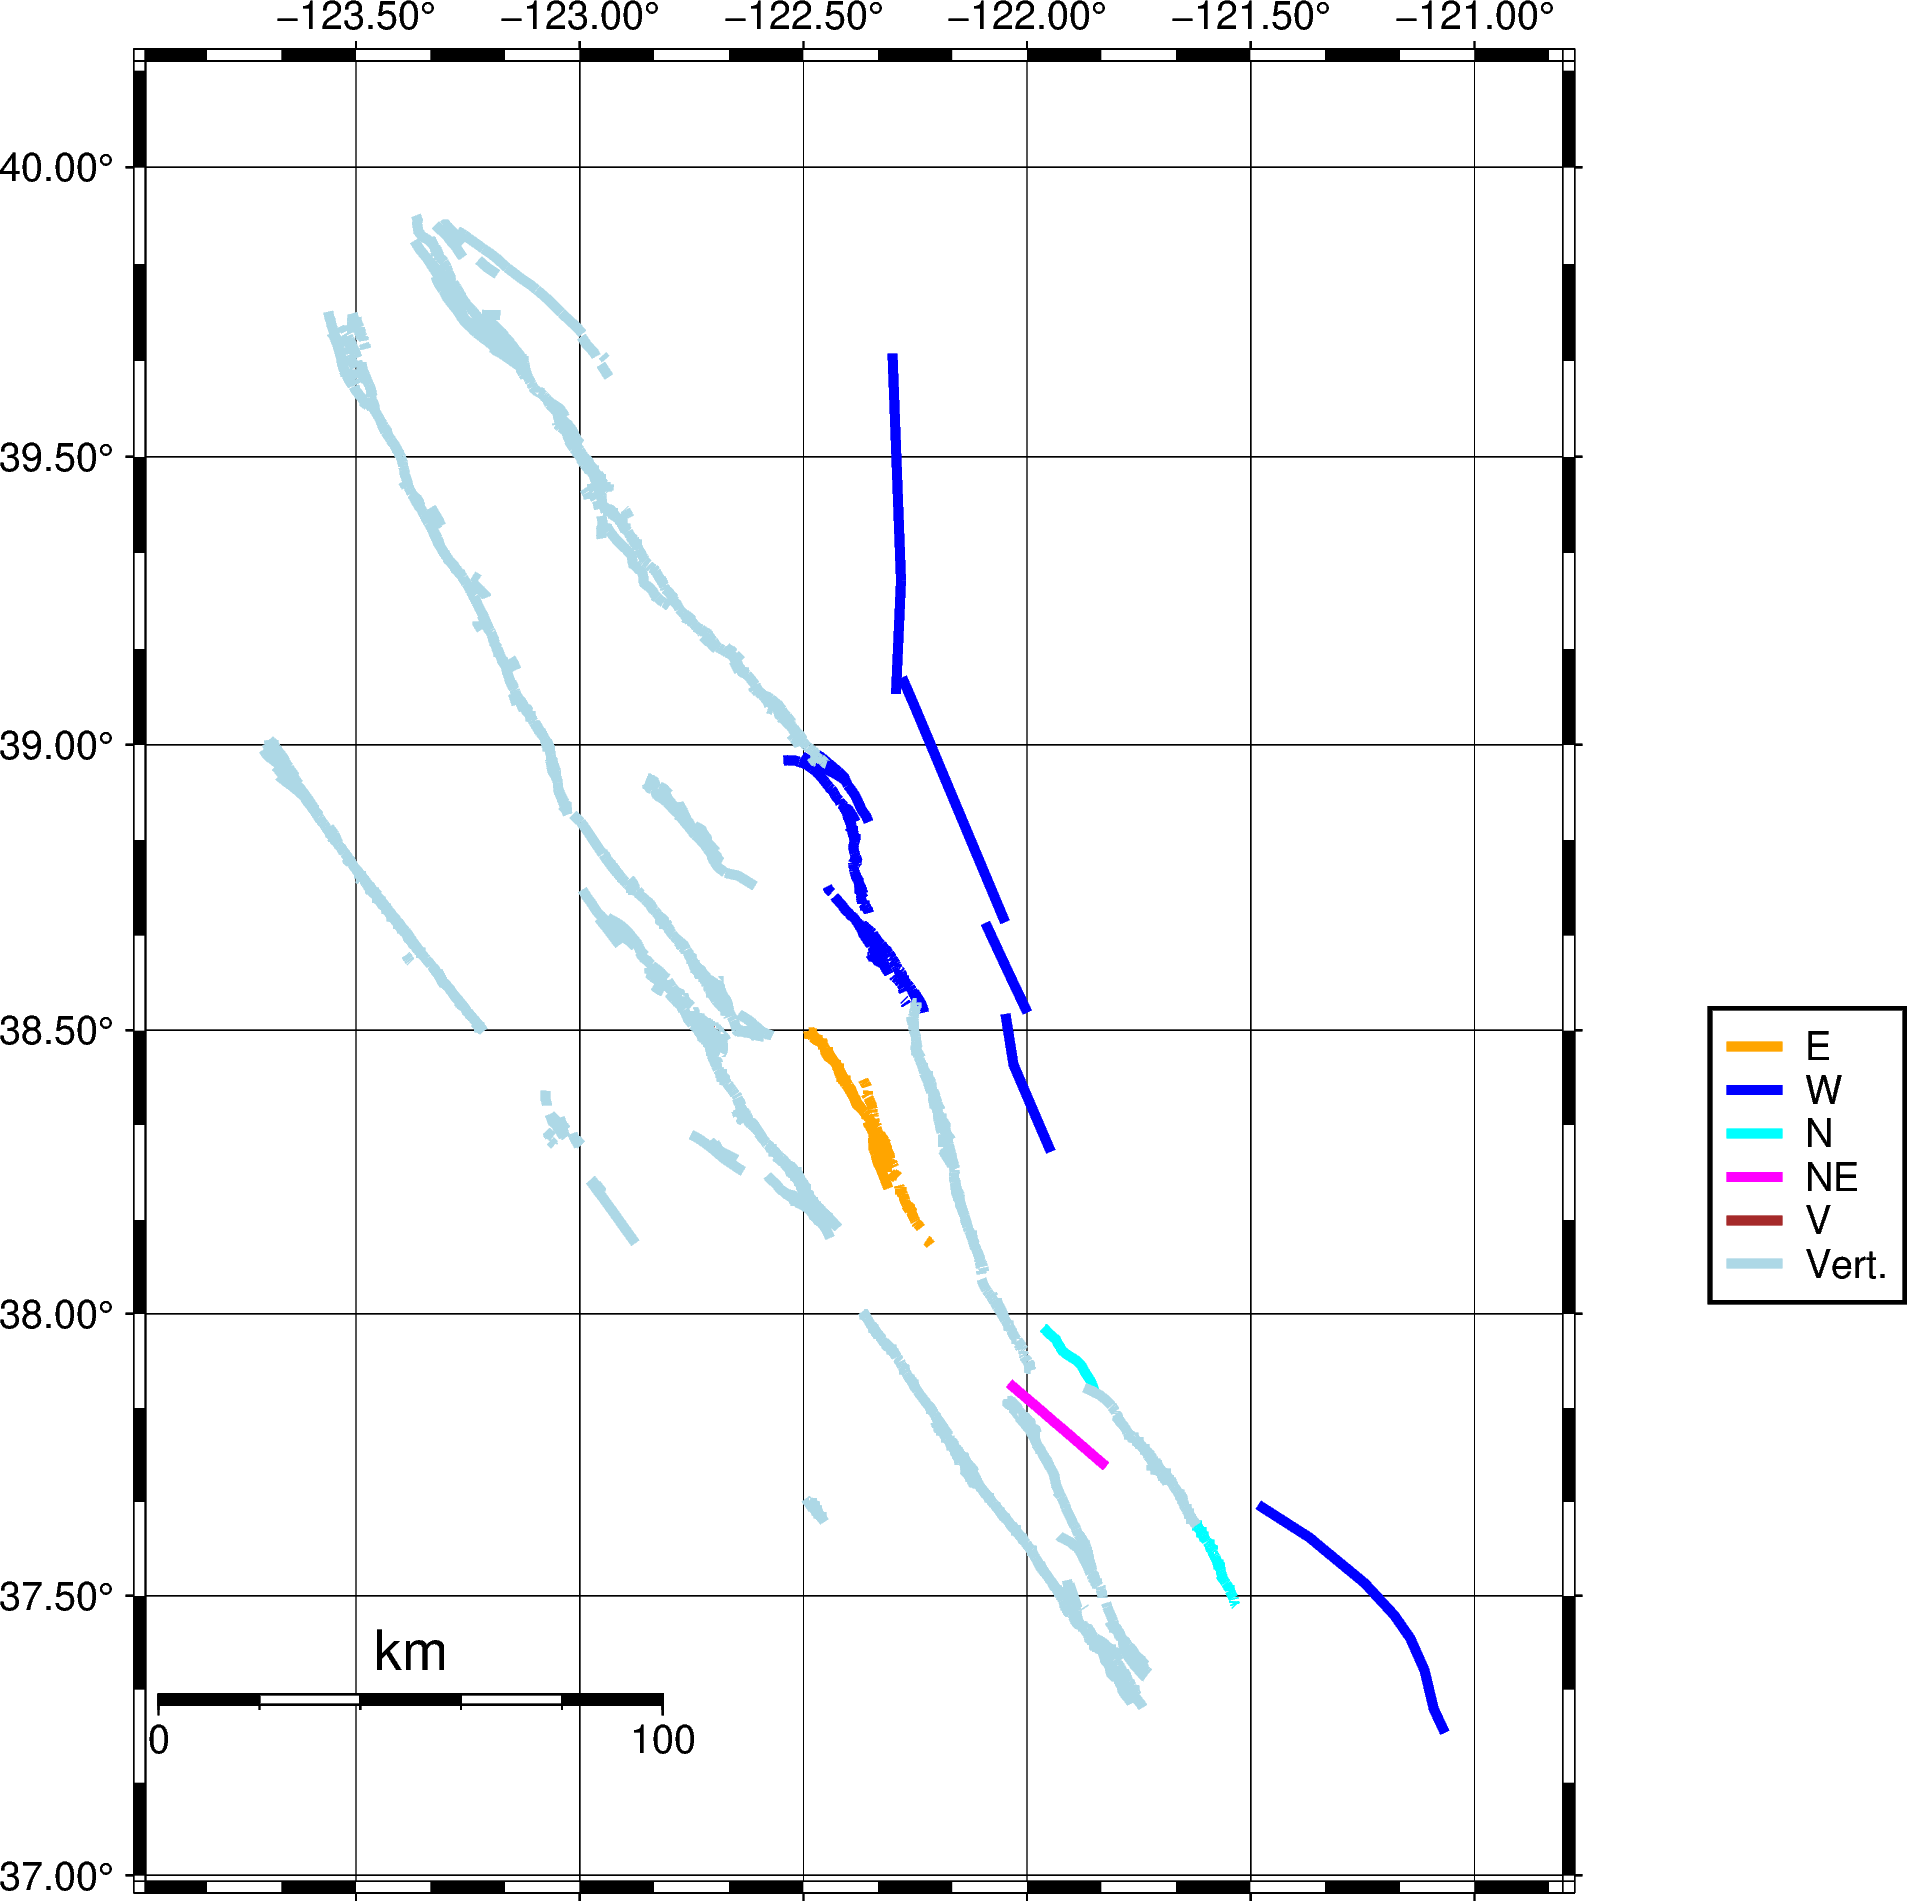

In [46]:
fig = mulshape.plot_map()
fig.basemap(map_scale=f"g{-123.51}/{37.2}+c{-123.51}/{37.2}+w{100}k+o0.5c/0.5c+f+lkm+at")
fig.legend(position=f"g{-120.5}/{38}+o0.1c",box='+gwhite+p1p')
fig.show()

Or you can plot it in a high resolution map. 

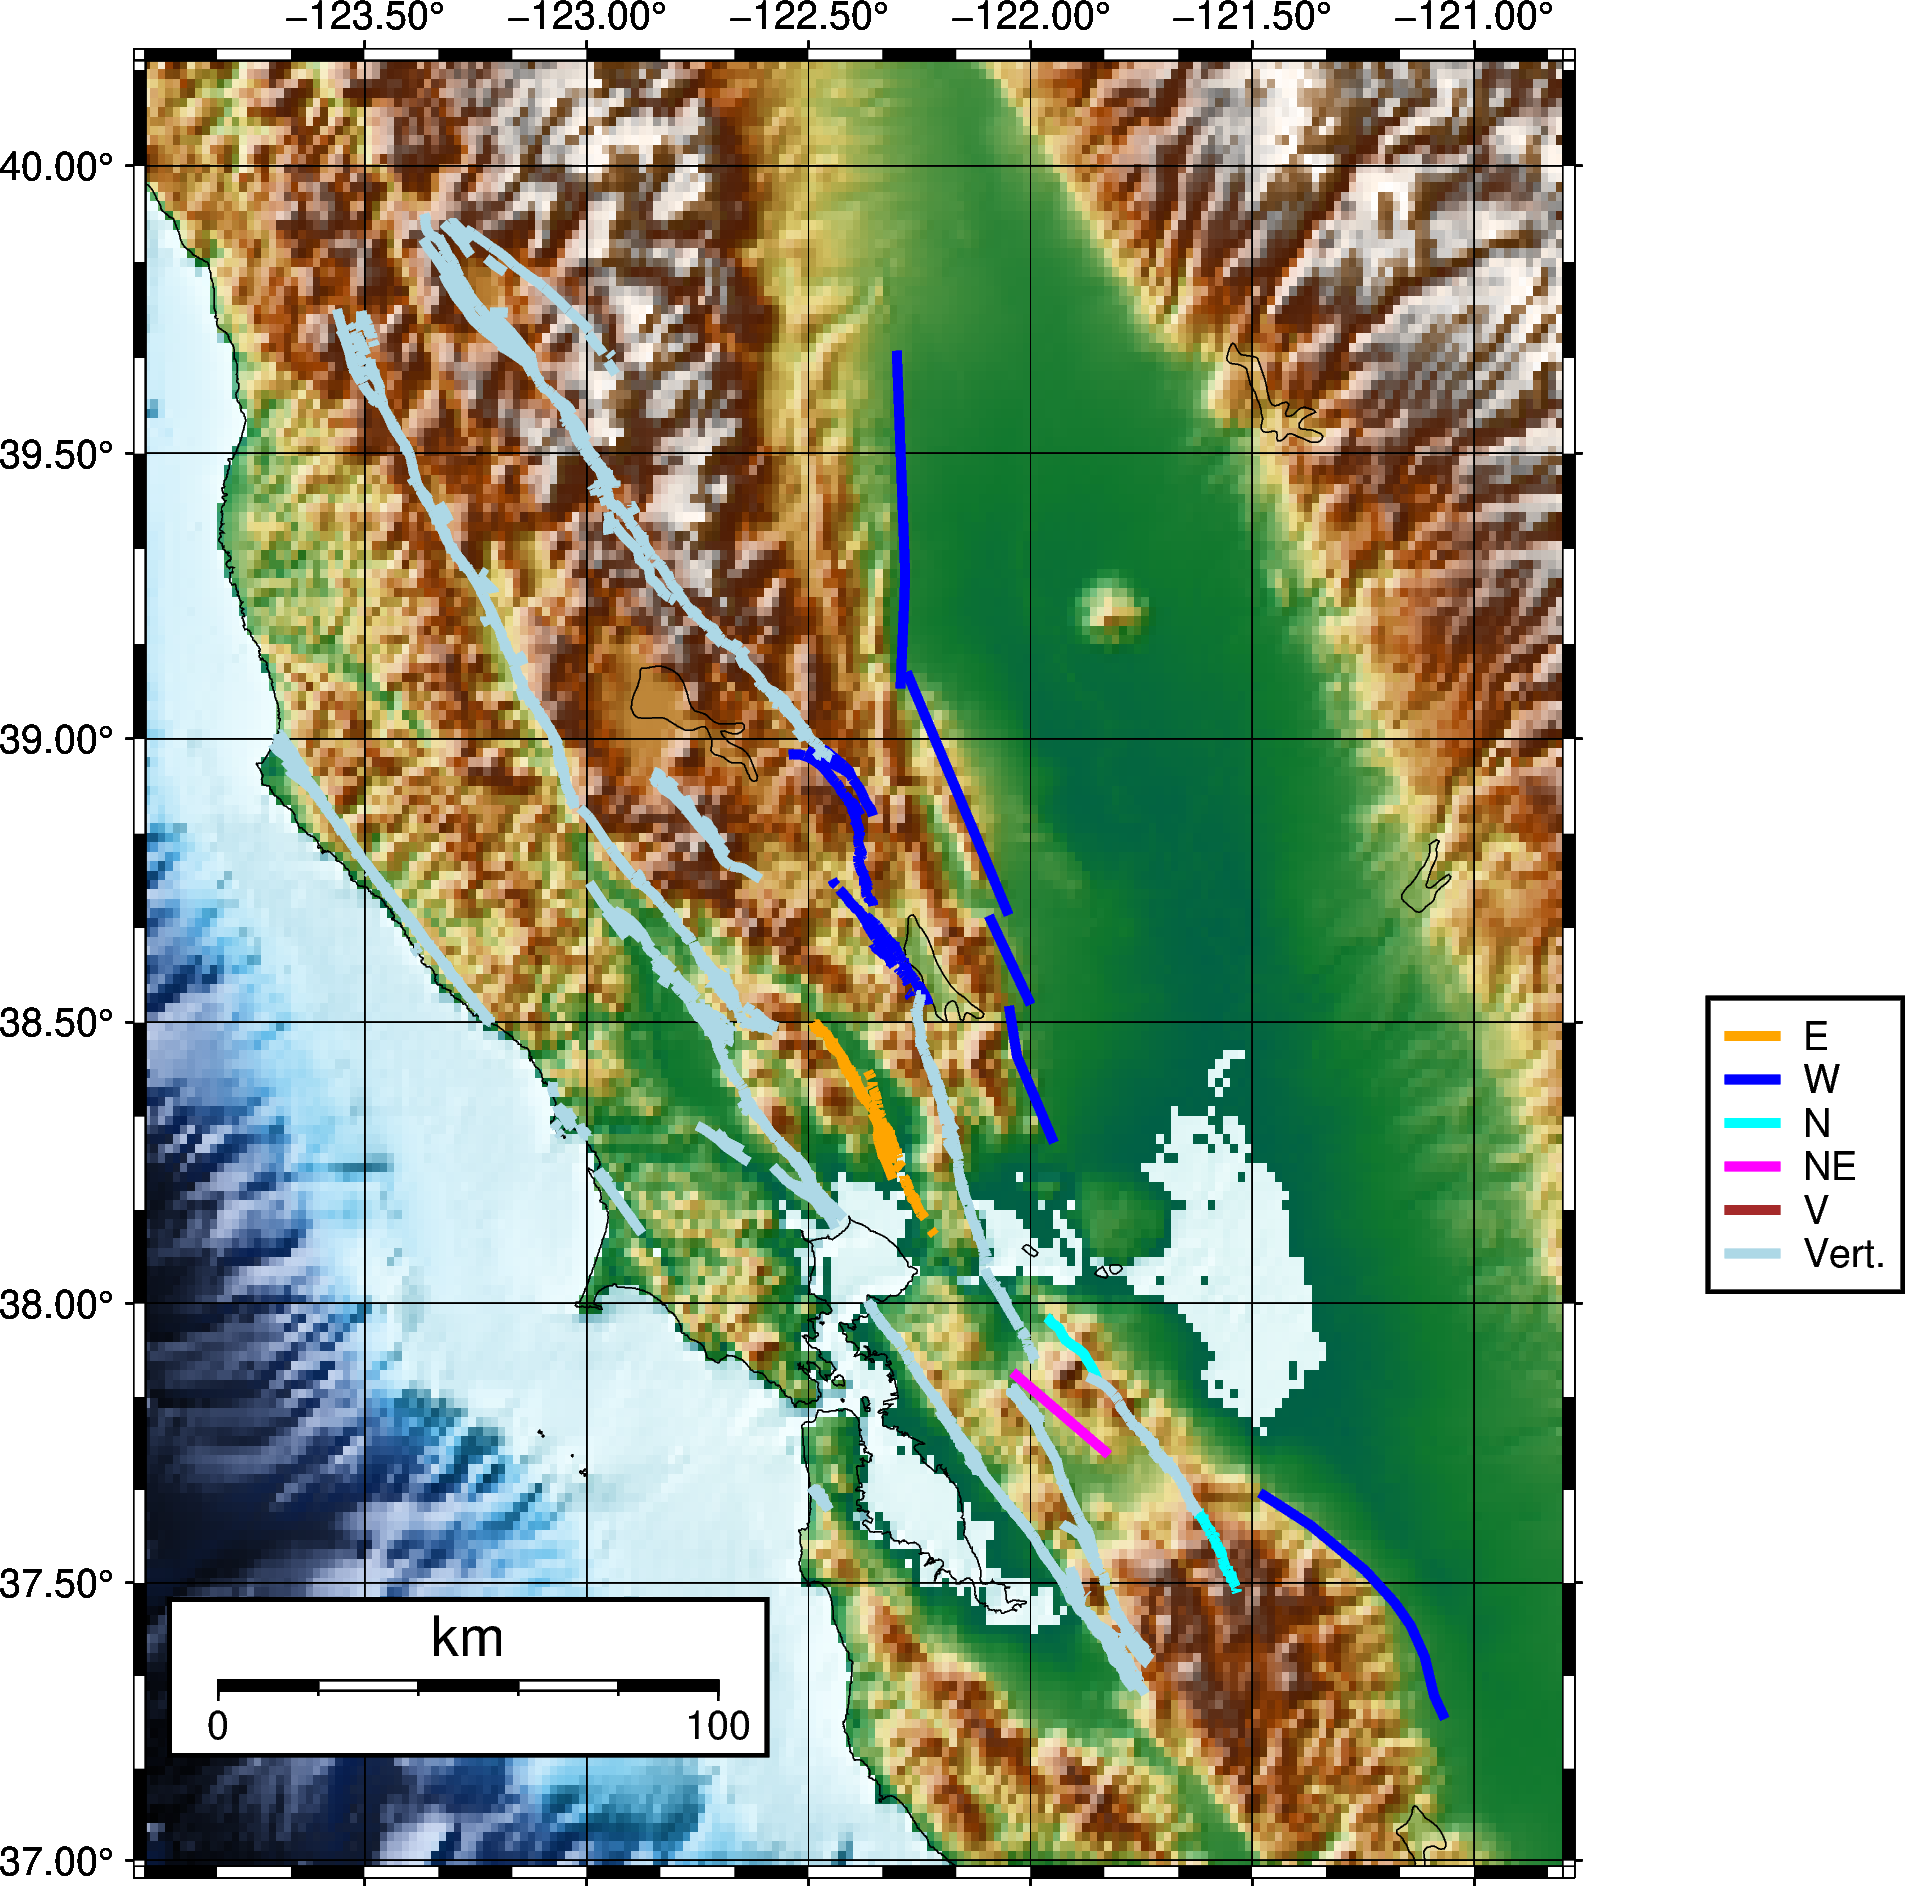

In [60]:
import pygmt

faults_region = faults_shape.get_region(padding=0.1)
faults_shape.baseplot.pen = "0.08c,red"

fig = pygmt.Figure() 
fig.basemap(region=faults_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.grdimage(
            '@earth_relief_01m', #01m resolution 
            cmap=True,
            shading=True,
            frame=["afg","WNse"]
        )
fig.coast(
            shorelines=True,
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = mulshape.plot_map(fig)
fig.basemap(map_scale=f"g{-123.4}/{37.2}+c{-123.4}/{37.2}+w{100}k+o0.5c/0.5c+f+lkm+at",box='+gwhite+p1p')
fig.legend(position=f"g{-120.5}/{38}+o0.1c",box='+gwhite+p1p')
fig.show()

coast [ERROR]: Pen name blue' not recognized!
coast [WARNING]: Representation of pen width (blue') not recognized. Using default.
coast [WARNING]: Representation of pen color ('2/blue']) not recognized. Using default.


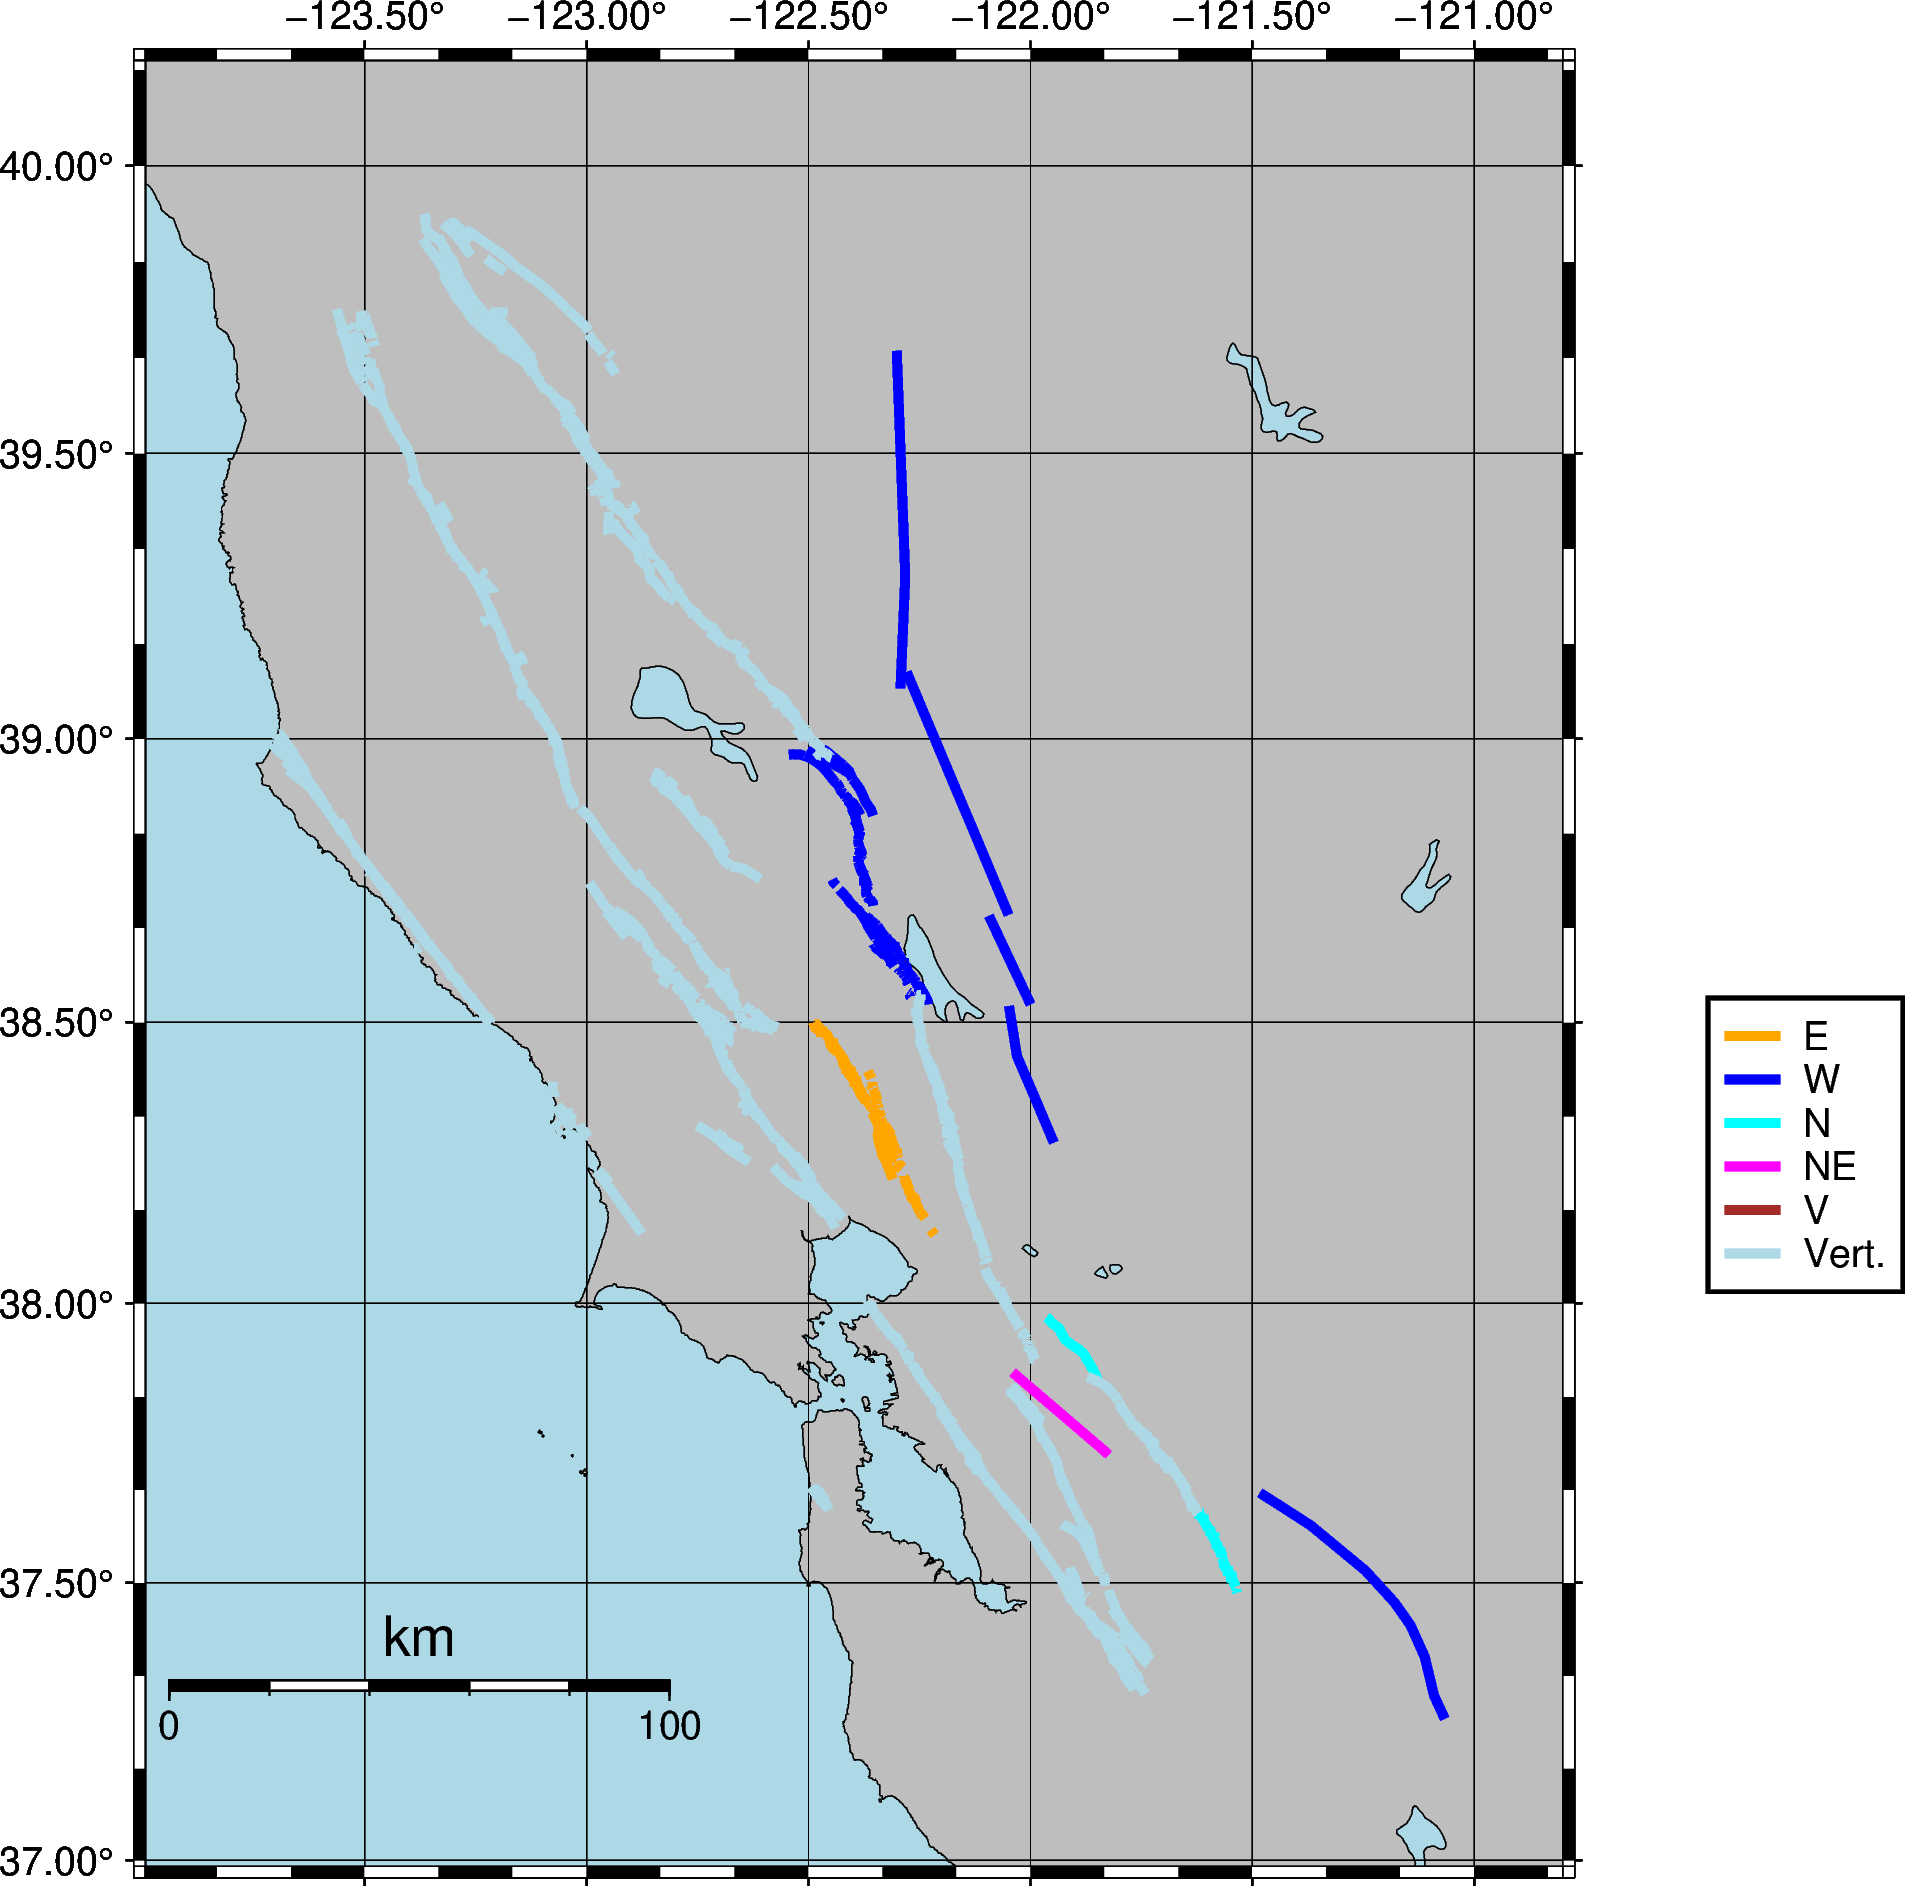

In [48]:
import pygmt

faults_region = faults_shape.get_region(padding=0.1)
faults_shape.baseplot.pen = "0.08c,red"

fig = pygmt.Figure() 
fig.basemap(region=faults_region,
            projection="M12c", 
            frame=["af","WNse"])
fig.coast(
            land="gray",
            water="lightblue",
            shorelines=True,
            rivers= "['2/blue','2/blue']",
            borders='1/1p,black',
            frame=["afg","WNse"],
        )
fig = mulshape.plot_map(fig)
fig.basemap(map_scale=f"g{-123.51}/{37.2}+c{-123.51}/{37.2}+w{100}k+o0.5c/0.5c+f+lkm+at")
fig.legend(position=f"g{-120.5}/{38}+o0.1c",box='+gwhite+p1p')
fig.show()